Output variable -> y

y -> Whether the client has subscribed a term deposit or not

Binomial ("yes" or "no")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler ,MinMaxScaler

# read and preprocess the data

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving bank-full (1) (1).csv to bank-full (1) (1).csv


In [ ]:
data=pd.read_csv('bank-full (1) (1).csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
data.corr()

<ipython-input-7-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
data=data.drop(columns='job')
data

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
data=pd.get_dummies(data,columns=['marital','education','default','housing','loan','contact','month','poutcome','y'])
data

,age,balance,day,duration,campaign,pdays,previous,marital_divorced,marital_married,marital_single,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,261,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
1,44,29,5,151,1,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,33,1,5,198,1,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
45207,71,1729,17,456,2,-1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
45208,72,5715,17,1127,5,184,3,0,1,0,...,0,1,0,0,0,0,1,0,0,1
45209,57,668,17,508,4,-1,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   marital_divorced     45211 non-null  uint8
 8   marital_married      45211 non-null  uint8
 9   marital_single       45211 non-null  uint8
 10  education_primary    45211 non-null  uint8
 11  education_secondary  45211 non-null  uint8
 12  education_tertiary   45211 non-null  uint8
 13  education_unknown    45211 non-null  uint8
 14  default_no           45211 non-null  uint8
 15  default_yes          45211 non-null  uint8
 16  housing_no           4

In [ ]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous,marital_divorced,marital_married,marital_single,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.164674,0.286257,-0.427817,...,-0.127431,0.032775,0.060116,0.032418,-0.004927,-0.022967,0.035526,-0.000816,-0.025155,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,-0.021732,0.025708,-0.012537,...,-0.071121,0.117254,0.040198,0.021922,0.011857,0.008466,0.035240,-0.030271,-0.052838,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.000433,0.007102,-0.007412,...,-0.025066,0.096080,0.030514,-0.053890,-0.068700,-0.032952,-0.030321,0.086256,0.028348,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.006100,-0.022683,0.020328,...,0.007089,-0.006041,0.015076,0.015077,-0.018925,-0.001958,0.042389,-0.003491,-0.394521,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.015484,0.031371,-0.023120,...,-0.067551,-0.084697,-0.051031,-0.036718,-0.088131,-0.020107,-0.057486,0.107965,0.073172,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.002897,-0.027600,0.027943,...,0.079029,0.007892,0.056814,0.084427,0.701052,0.389791,0.228539,-0.869962,-0.103621,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,-0.004534,-0.012691,0.017006,...,0.001341,0.037868,0.053934,0.064990,0.350627,0.306615,0.201424,-0.532763,-0.093236,0.093236
marital_divorced,0.164674,-0.021732,-0.000433,0.006100,-0.015484,0.002897,-0.004534,1.000000,-0.443648,-0.226602,...,0.008365,0.009247,-0.003279,-0.007816,-0.001884,0.003887,-0.008490,0.003478,-0.002772,0.002772
marital_married,0.286257,0.025708,0.007102,-0.022683,0.031371,-0.027600,-0.012691,-0.443648,1.000000,-0.772357,...,-0.036744,0.022404,-0.009709,-0.012265,-0.004516,-0.027570,-0.018484,0.026338,0.060260,-0.060260
marital_single,-0.427817,-0.012537,-0.007412,0.020328,-0.023120,0.027943,0.017006,-0.226602,-0.772357,1.000000,...,0.034005,-0.030902,0.012875,0.018869,0.006244,0.027208,0.026105,-0.031089,-0.063526,0.063526


<Axes: >

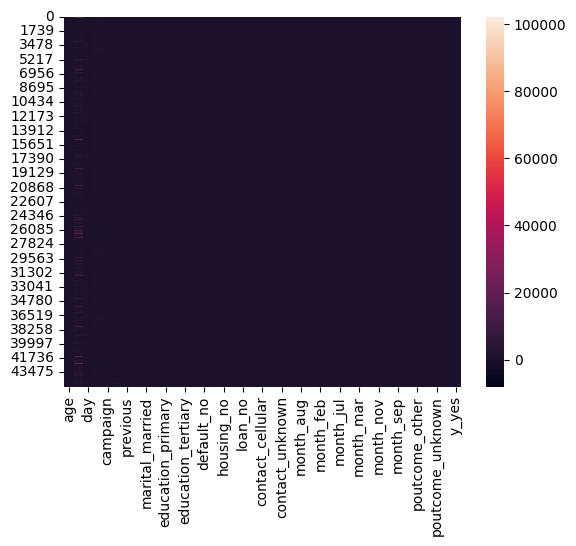

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data)


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


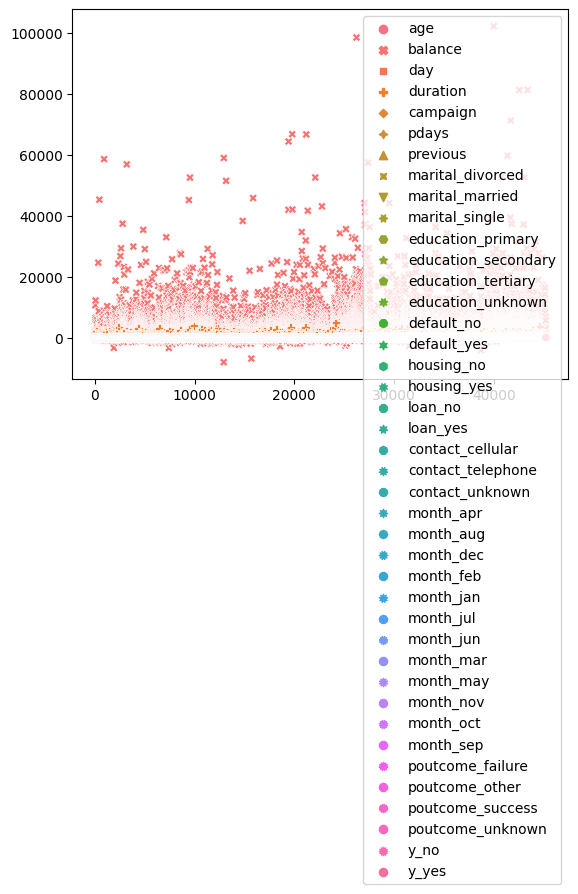

In [ ]:
sns.scatterplot(data)

<ipython-input-15-40c10e8c4001>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


<Axes: ylabel='Density'>

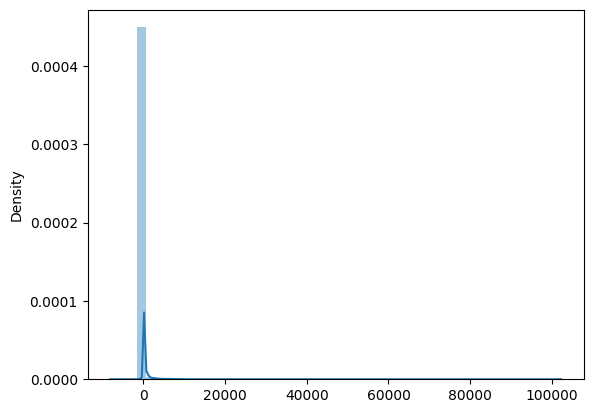

In [ ]:
sns.distplot(data)

In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x

,age,balance,day,duration,campaign,pdays,previous,marital_divorced,marital_married,marital_single,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no
0,58,2143,5,261,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
1,44,29,5,151,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
4,33,1,5,198,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
45207,71,1729,17,456,2,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
45208,72,5715,17,1127,5,184,3,0,1,0,...,0,0,1,0,0,0,0,1,0,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y_yes, Length: 45211, dtype: uint8

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)


In [ ]:
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
x_train_scaled

array([[0.20779221, 0.06049149, 0.66666667, ..., 0.        , 1.        ,
        1.        ],
       [0.2987013 , 0.07593554, 0.23333333, ..., 0.        , 1.        ,
        1.        ],
       [0.35064935, 0.06412539, 0.43333333, ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.16883117, 0.07774331, 0.03333333, ..., 0.        , 1.        ,
        1.        ],
       [0.11688312, 0.06594233, 0.1       , ..., 0.        , 1.        ,
        0.        ],
       [0.4025974 , 0.07752308, 0.93333333, ..., 0.        , 1.        ,
        1.        ]])

In [ ]:
x_test_scaled

array([[0.48051948, 0.0628315 , 0.63333333, ..., 0.        , 1.        ,
        1.        ],
       [0.16883117, 0.07953273, 0.63333333, ..., 0.        , 1.        ,
        1.        ],
       [0.12987013, 0.08350616, 0.56666667, ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.19480519, 0.06433645, 0.43333333, ..., 0.        , 1.        ,
        1.        ],
       [0.23376623, 0.06381339, 1.        , ..., 0.        , 1.        ,
        1.        ],
       [0.44155844, 0.0628315 , 0.7       , ..., 0.        , 1.        ,
        1.        ]])

# model

In [ ]:
model=LogisticRegression()
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [ ]:
model.coef_

array([[ 7.54018216e-02,  3.13243029e-02, -7.47524511e-02,
         1.14697695e+00, -9.97597101e-02,  1.34497113e-02,
         5.38883959e-03,  1.92340758e-02, -1.03034089e-01,
         8.38131394e-02, -7.53044721e-02, -1.05897385e-02,
         5.55187788e-02,  3.03885581e-02,  2.73999508e-02,
        -2.73868245e-02,  1.54762171e-01, -1.54749045e-01,
         1.08441277e-01, -1.08428151e-01,  2.16588441e-01,
         7.91167830e-02, -2.95692097e-01,  1.00680555e-01,
        -2.28935132e-01,  9.67718878e-02, -4.01719603e-02,
        -1.52107474e-01, -1.94313635e-01,  5.30123572e-02,
         2.37859414e-01, -1.49367989e-01, -1.65334299e-01,
         2.46782983e-01,  1.95136418e-01, -1.93706669e-01,
        -5.41710667e-02,  5.54834715e-01, -3.06943854e-01,
        -1.32019751e+01]])

In [ ]:
beta_coefficents=pd.Series(model.coef_[0])
beta_coefficents

0      0.075402
1      0.031324
2     -0.074752
3      1.146977
4     -0.099760
5      0.013450
6      0.005389
7      0.019234
8     -0.103034
9      0.083813
10    -0.075304
11    -0.010590
12     0.055519
13     0.030389
14     0.027400
15    -0.027387
16     0.154762
17    -0.154749
18     0.108441
19    -0.108428
20     0.216588
21     0.079117
22    -0.295692
23     0.100681
24    -0.228935
25     0.096772
26    -0.040172
27    -0.152107
28    -0.194314
29     0.053012
30     0.237859
31    -0.149368
32    -0.165334
33     0.246783
34     0.195136
35    -0.193707
36    -0.054171
37     0.554835
38    -0.306944
39   -13.201975
dtype: float64

In [ ]:
y_pred=model.predict(x_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
y_pred_df=pd.DataFrame({'actual':y_test,'predict':y_pred})
y_pred_df

,actual,predict
4393,0,0
4438,0,0
11108,0,0
35421,0,0
2667,0,0
...,...,...
14135,0,0
811,0,0
2885,0,0
18605,0,0


In [ ]:
data()

age                    45211
balance                45211
day                    45211
duration               45211
campaign               45211
pdays                  45211
previous               45211
marital_divorced       45211
marital_married        45211
marital_single         45211
education_primary      45211
education_secondary    45211
education_tertiary     45211
education_unknown      45211
default_no             45211
default_yes            45211
housing_no             45211
housing_yes            45211
loan_no                45211
loan_yes               45211
contact_cellular       45211
contact_telephone      45211
contact_unknown        45211
month_apr              45211
month_aug              45211
month_dec              45211
month_feb              45211
month_jan              45211
month_jul              45211
month_jun              45211
month_mar              45211
month_may              45211
month_nov              45211
month_oct              45211
month_sep     

In [ ]:
confusion_matrix_result = confusion_matrix(y_test,y_pred)
confusion_matrix_result

array([[7994,    0],
       [   0, 1049]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7994
           1       1.00      1.00      1.00      1049

    accuracy                           1.00      9043
   macro avg       1.00      1.00      1.00      9043
weighted avg       1.00      1.00      1.00      9043



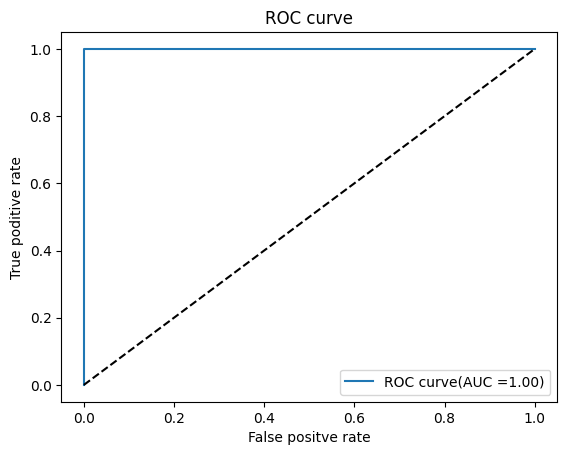

In [ ]:
fpr,tpr,thresholds =roc_curve(y_test,y_pred)
auc=roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label='ROC curve(AUC =%0.2f)' % auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False positve rate')
plt.ylabel('True poditive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()